In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
final_waveform_df = pd.read_csv("final_waveform_summary.csv")
type_correction = {'A': 'AG', 'B': 'BG', 'C': 'CG', 'N': 'NG', 'AN': 'AG', 'BN': 'BG', 'CN': 'CG'}
for var in final_waveform_df.variable:
    if var in type_correction:
        final_waveform_df.variable[final_waveform_df.variable == var] = type_correction[var]

              device        file variable                  class
0     Non UPS load A  wv00000001      Vcg  Sub-Cycle Disturbance
1     Non UPS load A  wv00000002      Vcg  Sub-Cycle Disturbance
2     Non UPS load A  wv00000003      Vcg  Sub-Cycle Disturbance
3     Non UPS load A  wv00000004      Vag  Sub-Cycle Disturbance
4     Non UPS load A  wv00000004      Vbg  Sub-Cycle Disturbance
...              ...         ...      ...                    ...
3105       Utility B  wv00000756      NaN  Sub-Cycle Disturbance
3106       Utility B  wv00000757      NaN  Sub-Cycle Disturbance
3107       Utility B  wv00000758      NaN  Sub-Cycle Disturbance
3110       Utility B  wv00000759      NaN  Sub-Cycle Disturbance
3111       Utility B  wv0000075b      NaN  Sub-Cycle Disturbance

[1732 rows x 4 columns]


In [2]:
directory_summary_dict = {"Non UPS load A" : "Substation feed to Non-UPS Load from Utility A",
                          "Non UPS load B" : "Substation feed to Non-UPS Load from Utility B",
                          "UPS A input": "Substation feed to UPS1-A",
                          "UPS B input": "Substation Feed to UPS1-B",
                          "UPS A output": "UPS1-A Output",
                          "UPS B Output" : "UPS1-B Output",
                          "Utility B": "Utility B"}

class_list = ["Sub-Cycle Disturbance", "Sag", "Swell", "Fast Transient", "Out of Limits"]

In [9]:
for cls in class_list:
    unique_variables = final_waveform_df[final_waveform_df['class'] == cls]['variable'].unique()
    print(f"Class: {cls}, Unique Variables: {unique_variables}")

Class: Sub-Cycle Disturbance, Unique Variables: ['Vcg' 'Vag' 'Vbg' nan]
Class: Sag, Unique Variables: ['Vcn' 'Van' 'Vbn' 'Vab' 'Vbc' 'Vca']
Class: Swell, Unique Variables: ['Van' 'Vbn']
Class: Fast Transient, Unique Variables: ['A' 'B' 'C' 'N']
Class: Out of Limits, Unique Variables: ['Vllavg']


In [7]:
random_samples = []

for cls in class_list:
    filtered = final_waveform_df[(final_waveform_df['class'] == cls) & 
                                 (final_waveform_df['variable'].isin(['Vag', 'Vbg', 'Vcg']))]
    if not filtered.empty:
        random_samples.append(filtered.sample(n=min(3, len(filtered))))

result_df = pd.concat(random_samples, ignore_index=True)
print(result_df)

           device        file  event_id        trigger_timestamp        date  \
0     UPS A input  wv000000fa       505  2017-10-07 23:19:40.591  2017-10-07   
1  Non UPS load A  wv00000195       513  2018-06-18 22:56:06.083  2018-06-18   
2  Non UPS load B  wv00000174       480  2020-02-17 12:33:27.210  2020-02-17   

   hour  minute  second  millisec variable                  class sub_class  \
0  23.0    19.0    40.0     591.0      Vcg  Sub-Cycle Disturbance       NaN   
1  22.0    56.0     6.0      83.0      Vag  Sub-Cycle Disturbance       NaN   
2  12.0    33.0    27.0     210.0      Vag  Sub-Cycle Disturbance       NaN   

  severity  
0      NaN  
1      NaN  
2      NaN  


In [8]:
result_df.shape

(3, 13)

In [24]:
for index, row in result_df.iterrows():
    print(f"Device: {directory_summary_dict[row.device]} File: {row.file}")

Device: Substation feed to UPS1-A File: wv000000fa
Device: Substation feed to Non-UPS Load from Utility A File: wv00000195
Device: Substation feed to Non-UPS Load from Utility B File: wv00000174


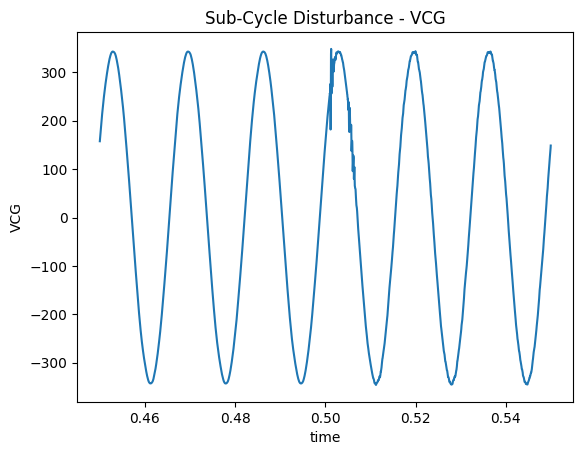

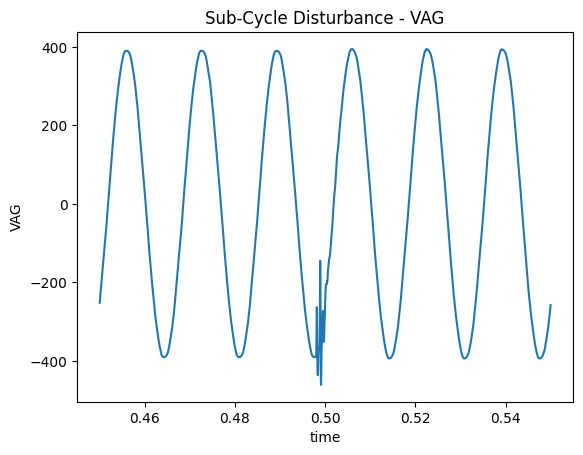

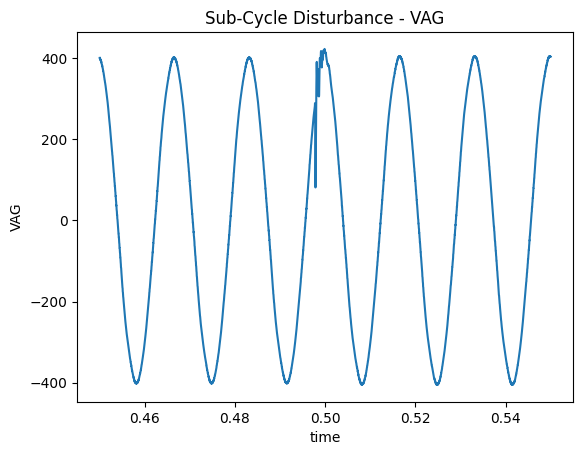

In [26]:
for index, row in result_df.iterrows():
    device = directory_summary_dict[row['device']]
    variable = row['variable'].upper()
    class_name = row['class']
    file_path = row['file'] + ".csv"
    full_path = os.path.join("Waveform_CSVs", device, file_path)
    
    try:
        temp_df = pd.read_csv(full_path)
        # Ensure 'time' and 'variable' columns exist
        if 'time' not in temp_df.columns or variable not in temp_df.columns:
            print(f"Missing required columns in {full_path}. Skipping...")
            continue
        
        temp_df = temp_df.loc[(temp_df['time'] > 0.45) & 
                              (temp_df['time'] < 0.55), ['time', variable]]
        output_filename = os.path.join("board_demo", f"{device}_{file_path}")
        temp_df.to_csv(output_filename, index=False)
        
        if temp_df.empty:
            print(f"No data in the specified time range for {full_path}. Skipping...")
            continue
        
        sns.lineplot(x=temp_df['time'], y=temp_df[variable])
        plt.title(f"{class_name} - {variable}")
        plt.show()
    except Exception as e:
        print(f"Error processing file {full_path}: {e}")

In [62]:
final_waveform_df.loc[(final_waveform_df['class'] == 'Sag') & (final_waveform_df['variable'] == 'Vab')]

,device,file,event_id,trigger_timestamp,date,hour,minute,second,millisec,variable,class,sub_class,severity
659,Non UPS load A,wv00000229,667,2020-08-25 19:47:33.602,2020-08-25,19.0,47.0,33.0,602.0,Vab,Sag,ITIC,L2
737,Non UPS load A,wv00000263,751,2022-10-17 11:09:43.354,2022-10-17,11.0,9.0,43.0,354.0,Vab,Sag,SEMI F47,L1
738,Non UPS load A,wv00000263,752,2022-10-17 11:09:43.471,2022-10-17,11.0,9.0,43.0,471.0,Vab,Sag,ITIC,L2
741,Non UPS load A,wv00000266,755,2022-12-04 08:06:23.098,2022-12-04,8.0,6.0,23.0,98.0,Vab,Sag,ITIC,L2
776,Non UPS load A,wv00000280,790,2024-05-08 02:20:48.110,2024-05-08,2.0,20.0,48.0,110.0,Vab,Sag,ITIC,L8
802,Non UPS load A,wv00000293,820,2025-04-03 00:36:29.973,2025-04-03,0.0,36.0,29.0,973.0,Vab,Sag,ITIC,L2
1318,Non UPS load B,wv00000192,522,2020-09-17 02:39:43.476,2020-09-17,2.0,39.0,43.0,476.0,Vab,Sag,ITIC,L2
1341,Non UPS load B,wv000001a6,545,2022-01-16 07:48:49.706,2022-01-16,7.0,48.0,49.0,706.0,Vab,Sag,ITIC,L4
1372,Non UPS load B,wv000001b5,576,2022-04-13 20:31:04.478,2022-04-13,20.0,31.0,4.0,478.0,Vab,Sag,ITIC,L2
1378,Non UPS load B,wv000001b9,582,2022-05-31 12:12:38.742,2022-05-31,12.0,12.0,38.0,742.0,Vab,Sag,ITIC,L4


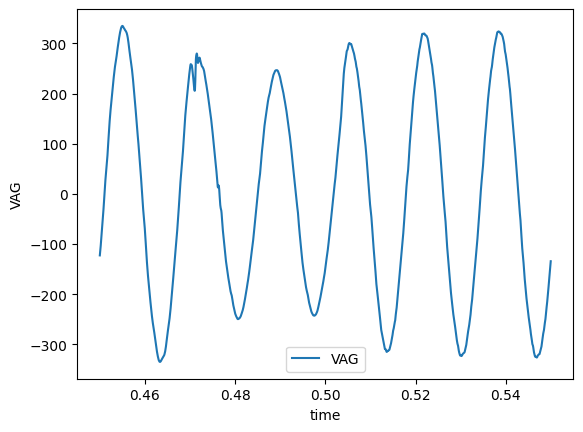

In [80]:
df = pd.read_csv("Waveform_CSVs/Substation feed to UPS1-A/wv00000196.csv")
df = df.loc[(df['time'] > 0.45) & 
                              (df['time'] < 0.55), ['time', 'VAG', 'VCG', 'VBG']]
df['VAB'] = df['VAG'] - df['VBG']
# sns.lineplot(x=df['time'], y=df['VAB'], label='VAB')
sns.lineplot(x=df['time'], y=df['VAG'], label='VAG')
# sns.lineplot(x=df['time'], y=df['VBG'], label='VBG')
# sns.lineplot(x=df['time'], y=df['VCG'], label='VCG')
plt.legend()
plt.show()

In [30]:
final_waveform_df.loc[final_waveform_df['class'] == 'Swell']

,device,file,event_id,trigger_timestamp,date,hour,minute,second,millisec,variable,class,sub_class,severity
16,Non UPS load A,wv0000000c,16,2011-04-28 09:20:32.391,2011-04-28,9.0,20.0,32.0,391.0,Van,Swell,ITIC,L2
18,Non UPS load A,wv0000000e,19,2011-05-04 18:32:08.436,2011-05-04,18.0,32.0,8.0,436.0,Vbn,Swell,ITIC,L2
826,Non UPS load B,wv00000011,23,2011-04-28 09:20:39.475,2011-04-28,9.0,20.0,39.0,475.0,Van,Swell,ITIC,L2
828,Non UPS load B,wv00000013,26,2011-05-04 19:55:41.461,2011-05-04,19.0,55.0,41.0,461.0,Van,Swell,ITIC,L2
1589,UPS A input,wv00000044,214,2011-05-04 18:32:07.640,2011-05-04,18.0,32.0,7.0,640.0,Vbn,Swell,ITIC,L2
1614,UPS A input,wv0000005b,253,2012-01-17 13:40:46.732,2012-01-17,13.0,40.0,46.0,732.0,Van,Swell,ITIC,L2


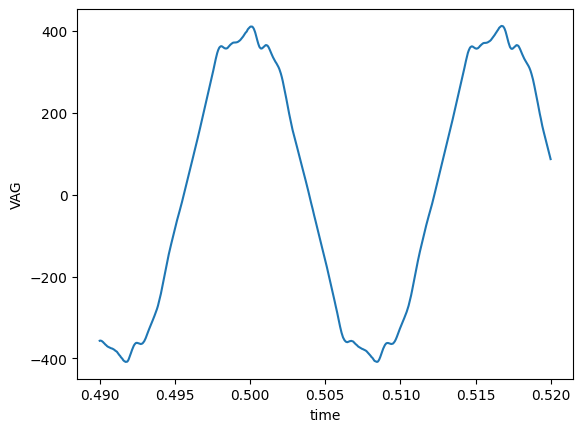

In [42]:
df = pd.read_csv("Waveform_CSVs/Substation feed to Non-UPS Load from Utility A/wv0000000c.csv")
df = df.loc[(df['time'] > 0.49) & 
                              (df['time'] < 0.52), ['time', 'VAG']]
sns.lineplot(x=df['time'], y=df['VAG'])
plt.show()

In [ ]:
def plot_waveform(device_name, file_name, event_id):
    #load full waveform data
    final_waveform_df = pd.read_csv("final_waveform_summary.csv")
    #perform type correction
    type_correction = {'A': 'VAG', 'B': 'VBG', 'C': 'VCG', 'N': 'VNG', 'Van': 'VAG', 'Vbn': 'VBG', 'Vcn': 'VCG'}
    for var in final_waveform_df['variable']:
        if var in type_correction:
            final_waveform_df.loc[final_waveform_df['variable'] == var, 'variable'] = type_correction[var]
    final_waveform_df['variable'] = final_waveform_df['variable'].str.upper()
    final_waveform_df = final_waveform_df[final_waveform_df['variable'].isin(['VAG', 'VBG', 'VCG', 'VNG'])]

    #set variable and class values
    variable = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) & 
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'variable'
    ].values[0].upper()
    _class = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) & 
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'class'
    ].values[0]

    #set file path
    file_path = os.path.join("Waveform_CSVs", directory_summary_dict[device_name], file_name + ".csv")
    #load dataframe for file
    df = pd.read_csv(file_path)
    #filter the time range
    df = df.loc[(df['time'] > 0.45) & 
                              (df['time'] < 0.55), ['time', 'VAG', 'VBG', 'VCG']]
    #plot the waveform
    sns.lineplot(x=df['time'], y=df[variable], label=variable)
    for col in ['VAG', 'VBG', 'VCG']:
        if col != variable:
            sns.lineplot(x=df['time'], y=df[col], label=col)
    plt.title(f"{_class} - {variable}")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage")
    return plt
    


In [101]:
import numpy as np

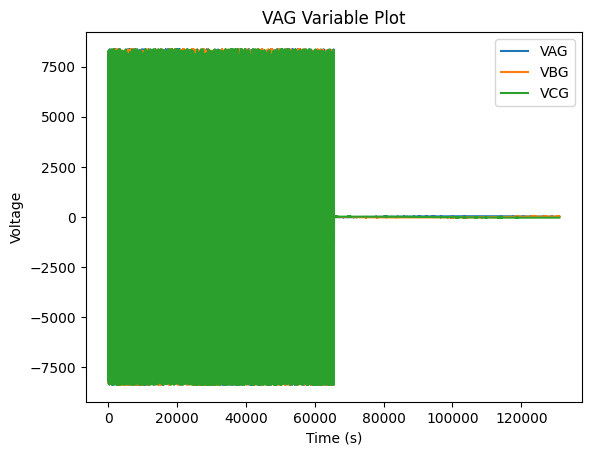

In [109]:
file_df = pd.read_csv("Waveform_CSVs/Substation feed to Non-UPS Load from Utility B/wv00000006.csv")
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VAG'], label='VAG')
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VBG'], label='VBG')
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VCG'], label='VCG')
plt.title("VAG Variable Plot")
plt.xlabel("Time (s)")
plt.ylabel("Voltage")
plt.show()

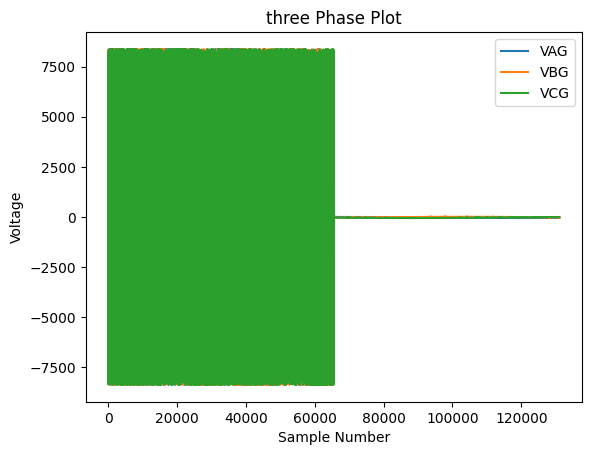

In [111]:
file_df = pd.read_csv("Waveform_CSVs/Substation feed to Non-UPS Load from Utility A/wv00000005.csv")
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VAG'], label='VAG')
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VBG'], label='VBG')
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VCG'], label='VCG')
plt.title("Three Phase Plot")
plt.xlabel("Sample Number")
plt.ylabel("Voltage")
plt.show()

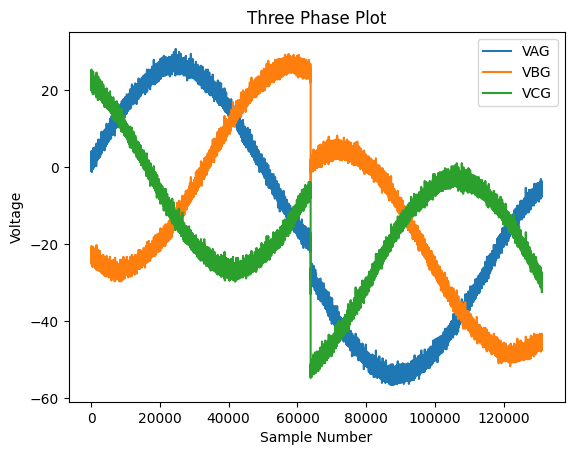

In [112]:
file_df = pd.read_csv("Waveform_CSVs/Substation feed to Non-UPS Load from Utility A/wv00000075.csv")
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VAG'], label='VAG')
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VBG'], label='VBG')
sns.lineplot(x=range(1, len(file_df) + 1), y=file_df['VCG'], label='VCG')
plt.title("Three Phase Plot")
plt.xlabel("Sample Number")
plt.ylabel("Voltage")
plt.show()

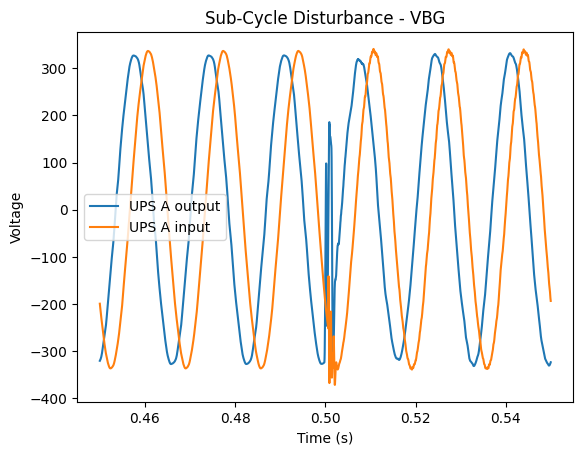

In [106]:
p1 = plot_waveform("UPS A output", "wv00000008", 4)
p2 = plot_waveform("UPS A input", "wv00000186", 674)

plt.xlabel("Time (s)")
plt.ylabel("Voltage")
plt.legend()


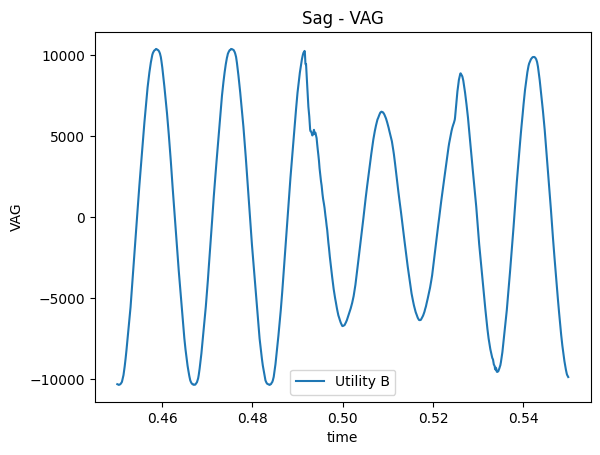

In [6]:
p3 = plot_waveform("Utility B", "wv00000791", 2366)
p3.show()

In [19]:
#load full waveform data
final_waveform_df = pd.read_csv("final_waveform_summary.csv")
#perform type correction
type_correction = {'A': 'VAG', 'B': 'VBG', 'C': 'VCG', 'N': 'VNG', 'Van': 'VAG', 'Vbn': 'VBG', 'Vcn': 'VCG'}
for var in final_waveform_df['variable']:
    if var in type_correction:
        final_waveform_df.loc[final_waveform_df['variable'] == var, 'variable'] = type_correction[var]

final_waveform_df.loc[(final_waveform_df['class'] == 'Sag') & (final_waveform_df['variable'].isin(['VAG', 'VBG', 'VCG']))]


,device,file,event_id,trigger_timestamp,date,hour,minute,second,millisec,variable,class,sub_class,severity
5,Non UPS load A,wv00000004,5,2011-03-08 15:49:26.089,2011-03-08,15.0,49.0,26.0,89.0,VCG,Sag,ITIC,L8
11,Non UPS load A,wv00000009,11,2011-03-31 23:17:25.564,2011-03-31,23.0,17.0,25.0,564.0,VAG,Sag,ITIC,L2
15,Non UPS load A,wv0000000b,15,2011-04-09 14:02:53.071,2011-04-09,14.0,2.0,53.0,71.0,VCG,Sag,ITIC,L8
19,Non UPS load A,wv0000000f,20,2011-05-21 07:08:33.301,2011-05-21,7.0,8.0,33.0,301.0,VBG,Sag,ITIC,L2
20,Non UPS load A,wv00000010,21,2011-05-21 14:13:11.499,2011-05-21,14.0,13.0,11.0,499.0,VAG,Sag,ITIC,L2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,Utility B,wv0000077f,2344,2025-03-30 21:59:22.930,2025-03-30,21.0,59.0,22.0,930.0,VBG,Sag,ITIC,L2
3163,Utility B,wv00000785,2351,2025-04-03 00:31:36.320,2025-04-03,0.0,31.0,36.0,320.0,VBG,Sag,ITIC,L2
3168,Utility B,wv0000078a,2356,2025-04-03 00:32:12.080,2025-04-03,0.0,32.0,12.0,80.0,VAG,Sag,ITIC,L2
3176,Utility B,wv00000790,2364,2025-04-03 00:33:48.152,2025-04-03,0.0,33.0,48.0,152.0,VCG,Sag,ITIC,L2


In [95]:
def board_csv(device_name, file_name, event_id):
    #load full waveform data
    final_waveform_df = pd.read_csv("final_waveform_summary.csv")
    #perform type correction
    type_correction = {'A': 'VAG', 'B': 'VBG', 'C': 'VCG', 'N': 'VNG', 'Van': 'VAG', 'Vbn': 'VBG', 'Vcn': 'VCG'}
    for var in final_waveform_df['variable']:
        if var in type_correction:
            final_waveform_df.loc[final_waveform_df['variable'] == var, 'variable'] = type_correction[var]

    #set variable and class values
    variable = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) & 
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'variable'
    ].values[0].upper()
    _class = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) & 
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'class'
    ].values[0]

    #set file path
    file_path = os.path.join("Waveform_CSVs", directory_summary_dict[device_name], file_name + ".csv")
    #load dataframe for file
    df = pd.read_csv(file_path)
    #filter the time range
    df = df.loc[(df['time'] > 0.4) & 
                              (df['time'] < 0.6), ['time', 'VAG', 'VBG', 'VCG']]
    output_directory = os.path.join("board_demo", _class)
    os.makedirs(output_directory, exist_ok=True)
    output_filename = os.path.join(output_directory, f"{device_name}_{file_name}.csv")
    df.to_csv(output_filename, index=False)


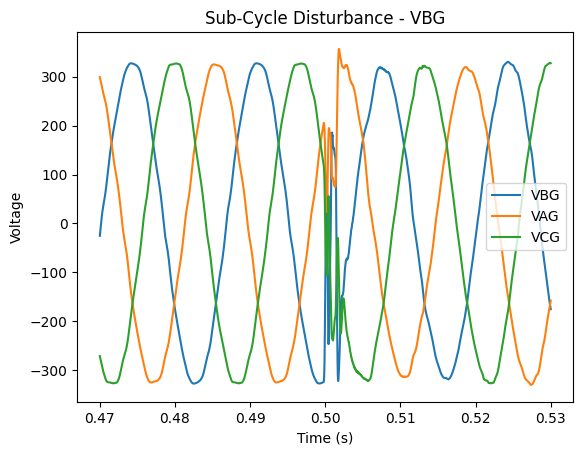

In [120]:
p = plot_waveform("UPS A output", "wv00000005", 4)
p.show()

In [121]:

board_csv("UPS A output", "wv00000005", 4)

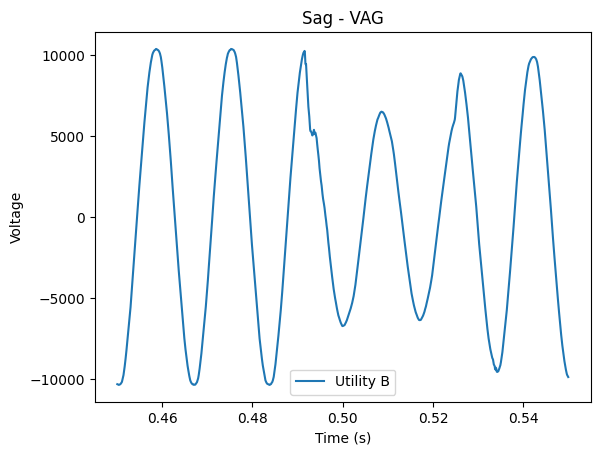

In [24]:
p = plot_waveform("Utility B", "wv00000791", 2366)
p.show()
board_csv("Utility B", "wv00000791", 2366)